In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import numpy as np

df = pd.read_csv('all_data.csv')

## Visualizations with bar plots of life expectancy and GDP for Mexico 

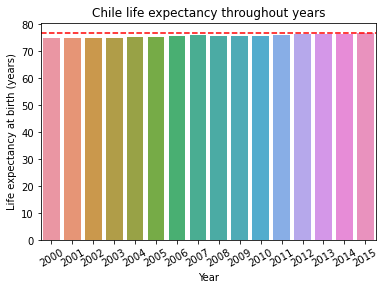

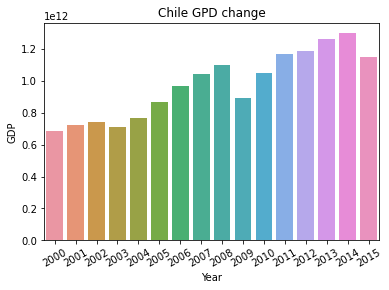

In [2]:
df_chile = df[df.Country == 'Chile']
df_mexico = df[df['Country'] == 'Mexico']
df_germany = df[df['Country'] == 'Germany']
df_no_z = df[df['Country'] != 'Zimbabwe']

sns.barplot(x = df_mexico.Year, y = df_mexico['Life expectancy at birth (years)'])
plt.xticks(rotation = 30)
plt.axhline(y=df_mexico['Life expectancy at birth (years)'].max(), color='red', linestyle='--', label='Threshold')
plt.title('Chile life expectancy throughout years')
plt.show()
plt.clf()

sns.barplot(x = df_mexico.Year, y = df_mexico.GDP)
plt.xticks(rotation = 30)
plt.title('Chile GPD change')
plt.show()

## Linear models of Life expectancy to GDP for countries except Zimbabwe

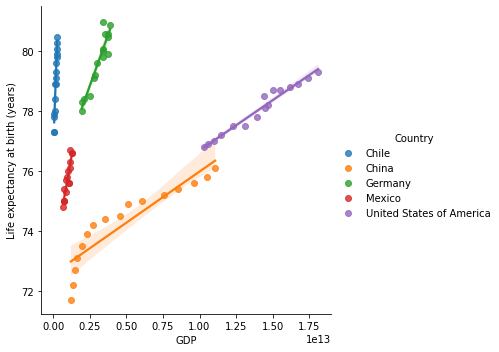

In [3]:
sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=df_no_z, hue='Country')
plt.show()

## Linear models Mexico and Germany plus correlation test and hypothesis null test

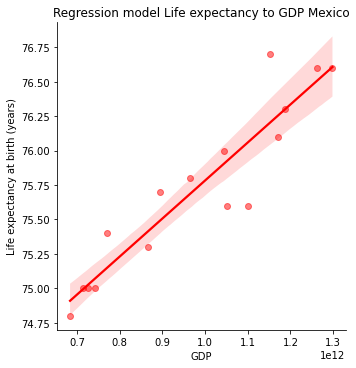

Pearson Correlation Coefficient: 0.932237716784708
P-value: 1.468696024830531e-07


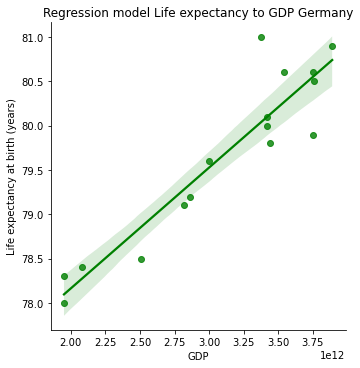

Pearson Correlation Coefficient: 0.932698898256127
P-value: 1.401881553404576e-07


In [4]:
scatter_kws = {'color': 'red','alpha': 0.5}
meline_kws = {'color': 'red'}
line_kws = {'color': 'green'}
de_scatter = {'color': 'green'}

ax1 = sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=df_mexico, scatter_kws = scatter_kws, line_kws = meline_kws, fit_reg = True)
ax1.set(title = 'Regression model Life expectancy to GDP Mexico')
plt.show()

correlation_coefficient, p_value = pearsonr(df_mexico.GDP, df_mexico['Life expectancy at birth (years)'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

ax2 = sns.lmplot(x='GDP', y='Life expectancy at birth (years)', data=df_germany, scatter_kws = de_scatter, line_kws = line_kws)
ax2.set(title = 'Regression model Life expectancy to GDP Germany')

plt.show()

correlation_coefficient, p_value = pearsonr(df_germany.GDP, df_germany['Life expectancy at birth (years)'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

## GDP and Life expectancy evolution in time. Graphical visual for better understanding of correlation

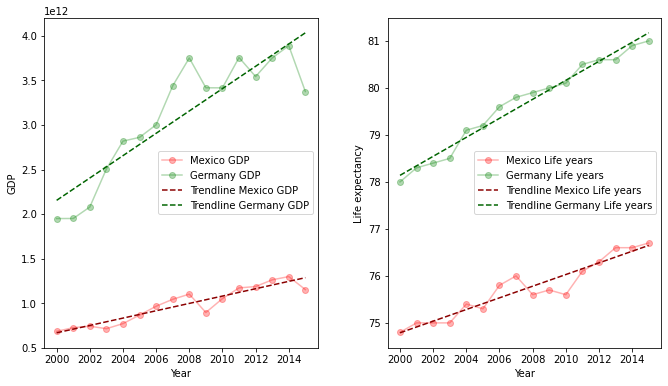

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def fit_line(x, y):
    coefficients = np.polyfit(x, y, 1)
    poly_function = np.poly1d(coefficients)
    return poly_function
plt.figure(figsize=(10, 6))

# Create a 1x2 grid for subplots
plt.subplot(1, 2, 1)

# Plot GDP for Mexico and Germany
plt.plot(df_mexico.Year, df_mexico.GDP, color='red', marker='o', label='Mexico GDP', alpha=0.3)
plt.plot(df_germany.Year, df_germany.GDP, color='green', marker='o', label='Germany GDP', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('GDP')
trendline_mexico = fit_line(df_mexico.Year, df_mexico.GDP)
trendline_germany = fit_line(df_germany.Year, df_germany.GDP)
plt.plot(df_mexico.Year, trendline_mexico(df_mexico.Year), color='darkred', linestyle='--', label='Trendline Mexico GDP')
plt.plot(df_germany.Year, trendline_germany(df_germany.Year), color='darkgreen', linestyle='--', label='Trendline Germany GDP')
plt.legend()

# Create a 1x2 grid for subplots
plt.subplot(1, 2, 2)

# Plot Life expectancy for Mexico and Germany
plt.plot(df_mexico.Year, df_mexico['Life expectancy at birth (years)'], color='red', marker='o', label='Mexico Life years', alpha=0.3)
plt.plot(df_germany.Year, df_germany['Life expectancy at birth (years)'], color='green', marker='o', label='Germany Life years', alpha=0.3)
trendline_mexico = fit_line(df_mexico.Year, df_mexico['Life expectancy at birth (years)'])
trendline_germany = fit_line(df_germany.Year, df_germany['Life expectancy at birth (years)'])
plt.plot(df_mexico.Year, trendline_mexico(df_mexico.Year), color='darkred', linestyle='--', label='Trendline Mexico Life years')
plt.plot(df_germany.Year, trendline_germany(df_germany.Year), color='darkgreen', linestyle='--', label='Trendline Germany Life years')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout(pad=3)

# Show the plot
plt.show()


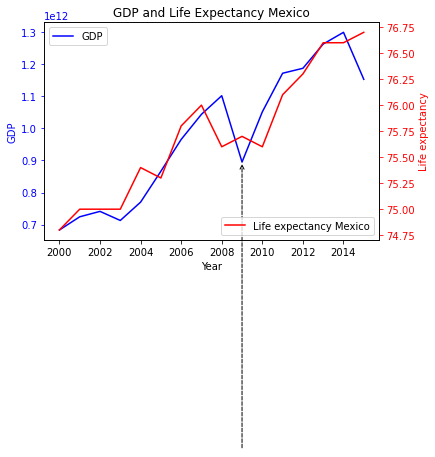

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = df_mexico.Year
y1 = df_mexico.GDP
y2 = df_mexico['Life expectancy at birth (years)']

# Create the first plot
fig, ax1 = plt.subplots()

# Plot the first dataset on the left y-axis
ax1.plot(x, y1, color='blue', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='blue')
ax1.tick_params('y', colors='blue')
# Create the second plot sharing the same x-axis
ax2 = ax1.twinx()

# Plot the second dataset on the right y-axis
ax2.plot(x, y2, color='red', label='Life expectancy Mexico')
ax2.set_ylabel('Life expectancy', color='red')
ax2.tick_params('y', colors='red')

highlight_year = 2009
highlight_gdp = df_mexico[df_mexico['Year'] == highlight_year]['GDP'].values[0]
highlight_life_expectancy = df_mexico[df_mexico['Year'] == highlight_year]['Life expectancy at birth (years)'].values[0]

ax1.annotate('',
             xy=(highlight_year, highlight_gdp), xycoords='data',
             xytext=(highlight_year, highlight_life_expectancy), textcoords='data',
             arrowprops=dict(arrowstyle="->", linestyle="--", color='black'),
             )

# Show the plots
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.title('GDP and Life Expectancy Mexico')
plt.show()


### With the 2008 market crash the GDP decreased as well as the life expectancy showing again a correlation